<a href="https://colab.research.google.com/github/NuwanSanjayaUkwatta/batch-25/blob/main/Maching%20Learning__House%20Price%20Prediction__Modeltraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/house data - house data.csv")

In [4]:
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [5]:
df.isnull().sum()

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

In [8]:
cor = df.corr()
cor

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
Price,1.000000,0.321623,0.739074,0.578310,0.467262,0.505958,0.567729,0.555242,0.137773
Bedroom,0.321623,1.000000,0.581410,0.841807,0.357425,0.045922,0.621555,0.189651,-0.116611
Space,0.739074,0.581410,1.000000,0.761927,0.422497,0.609800,0.598866,0.407141,0.079876
Room,0.578310,0.841807,0.761927,1.000000,0.499721,0.142749,0.767886,0.285706,0.039036
Lot,0.467262,0.357425,0.422497,0.499721,1.000000,0.202397,0.421500,0.154071,-0.037464
Tax,0.505958,0.045922,0.609800,0.142749,0.202397,1.000000,0.018013,0.420709,-0.133850
Bathroom,0.567729,0.621555,0.598866,0.767886,0.421500,0.018013,1.000000,0.269352,-0.005469
Garage,0.555242,0.189651,0.407141,0.285706,0.154071,0.420709,0.269352,1.000000,0.125645
Condition,0.137773,-0.116611,0.079876,0.039036,-0.037464,-0.133850,-0.005469,0.125645,1.000000


<Axes: xlabel='Room', ylabel='Price'>

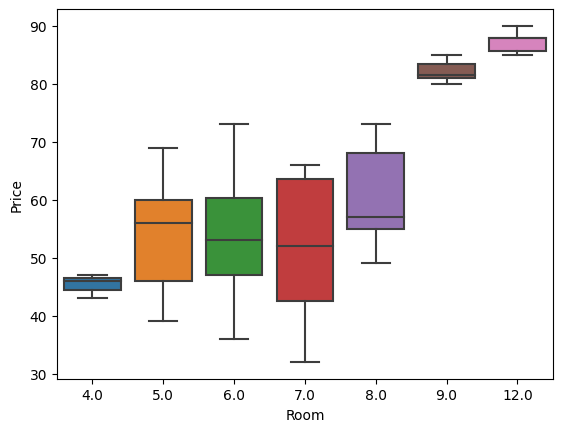

In [9]:
sns.boxplot(x="Room",y="Price",data=df)

<Axes: xlabel='Space', ylabel='Price'>

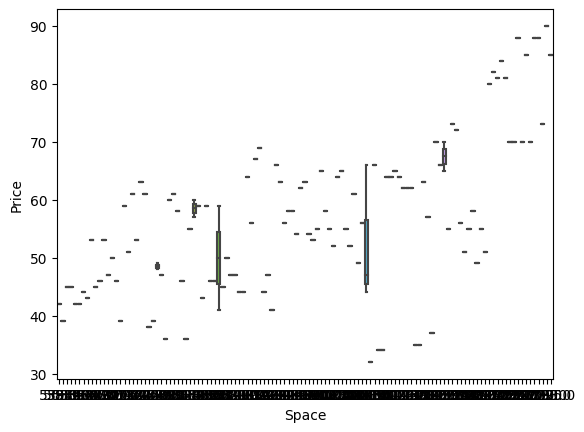

In [10]:
sns.boxplot(x="Space",y="Price",data=df)

<Axes: xlabel='Bedroom', ylabel='Price'>

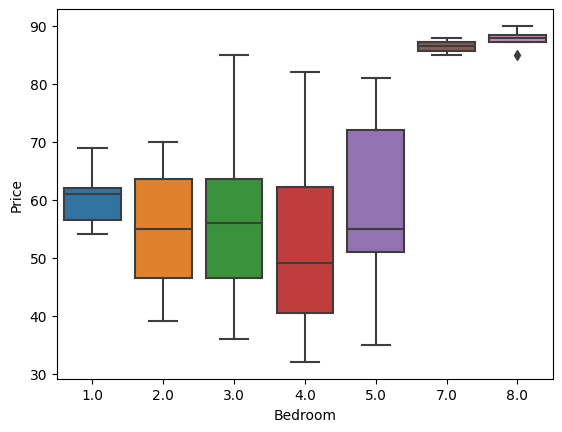

In [11]:
sns.boxplot(x="Bedroom",y="Price",data=df)

<Axes: xlabel='Lot', ylabel='Price'>

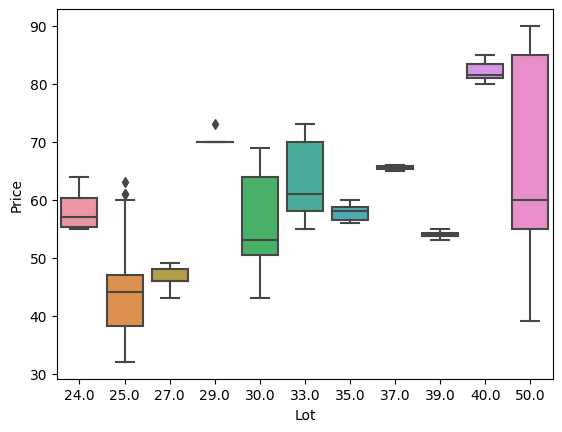

In [12]:
sns.boxplot(x="Lot",y="Price",data=df)

<Axes: xlabel='Tax', ylabel='Price'>

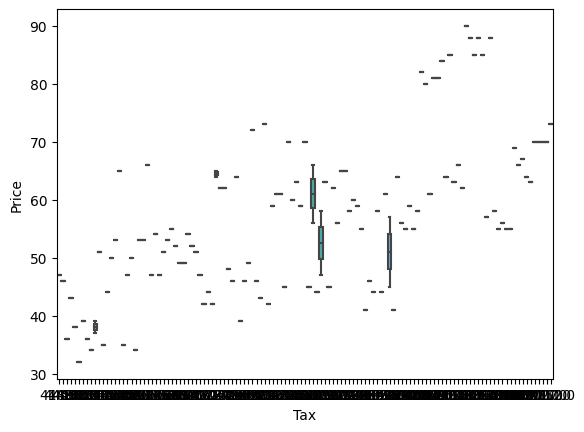

In [13]:
sns.boxplot(x="Tax",y="Price",data=df)

<Axes: xlabel='Bathroom', ylabel='Price'>

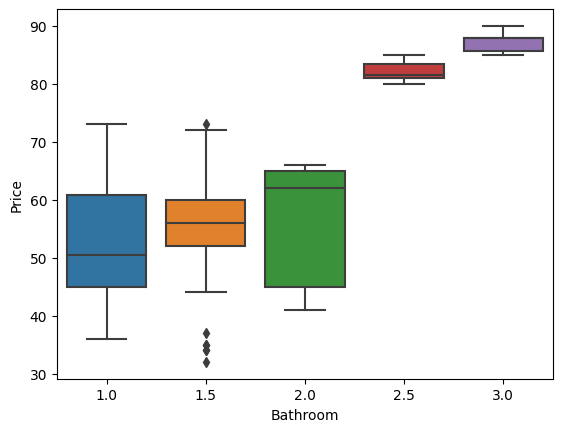

In [14]:
sns.boxplot(x="Bathroom",y="Price",data=df)

<Axes: xlabel='Garage', ylabel='Price'>

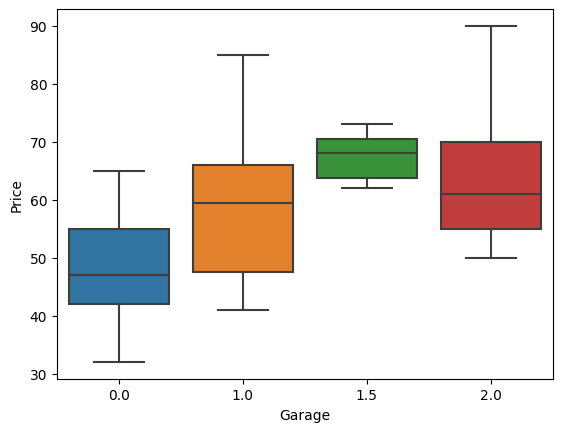

In [15]:
sns.boxplot(x="Garage",y="Price",data=df)

<Axes: xlabel='Garage', ylabel='Price'>

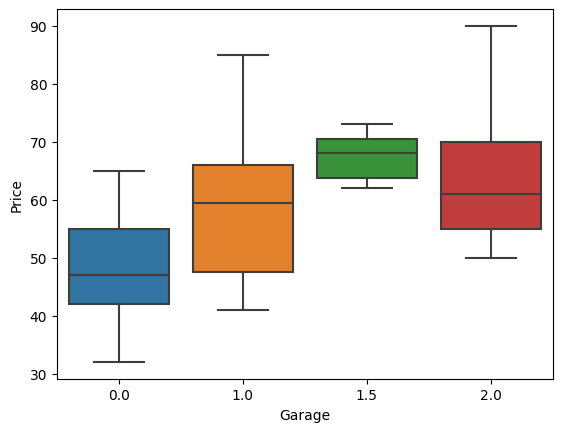

In [16]:
sns.boxplot(x="Garage",y="Price",data=df)

<Axes: xlabel='Bathroom', ylabel='Price'>

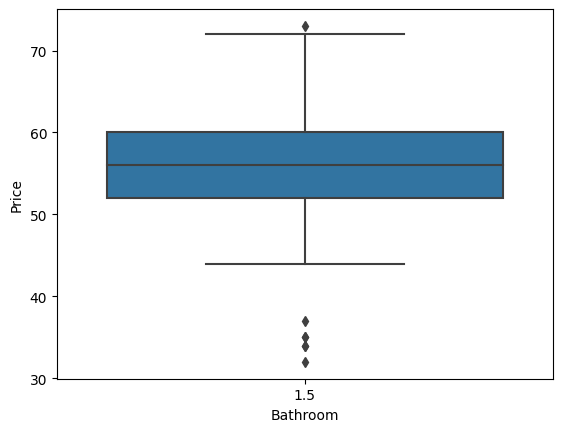

In [17]:
sns.boxplot(x="Bathroom",y="Price",data=df[df.Bathroom == 1.5])

In [18]:
q1 = df["Price"][df.Bathroom==1.5].quantile(0.25)
q3 = df["Price"][df.Bathroom==1.5].quantile(0.75)

iqr = q3-q1
ul = q3 + (0.2*iqr)
ll = q1 - (0.2*iqr)

ul,ll

(61.6, 50.4)

In [19]:
df_temp = df[df.Bathroom==1.5]
df_Bathroom_filtered = df_temp[((df_temp.Price >= ll) & (df_temp.Price <= ul))]

In [20]:
df_non_Bathroom = df[df.Bathroom!=1.5]
final_filtered = pd.concat([df_non_Bathroom,df_Bathroom_filtered])

<Axes: xlabel='Bathroom', ylabel='Price'>

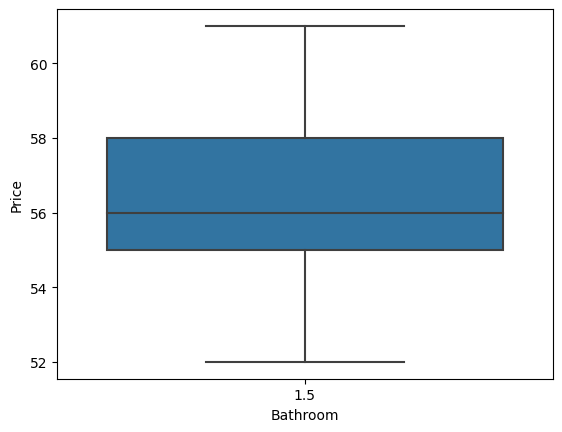

In [21]:
sns.boxplot(x="Bathroom",y="Price",data=final_filtered[final_filtered.Bathroom == 1.5])

In [22]:
df = final_filtered

<Axes: xlabel='Lot', ylabel='Price'>

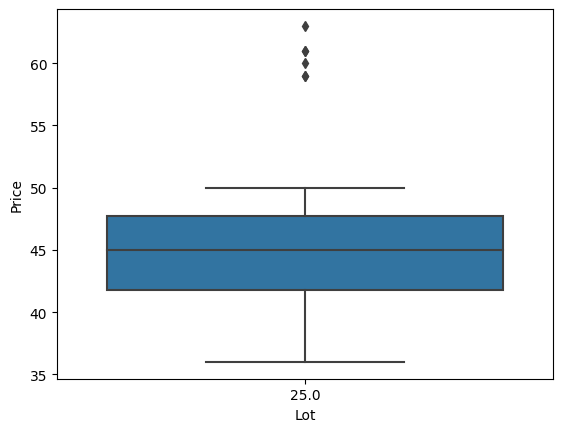

In [23]:
sns.boxplot(x="Lot",y="Price",data=df[df.Lot == 25])

In [24]:
q1 = df["Price"][df.Lot==25].quantile(0.25)
q3 = df["Price"][df.Lot==25].quantile(0.75)

iqr = q3-q1
ul = q3 + (1.3*iqr)
ll = q1 - (1.5*iqr)

ul,ll

(55.55, 32.75)

In [25]:
df_temp = df[df.Lot==25]
df_Lot_filtered = df_temp[((df_temp.Price >= ll) & (df_temp.Price <= ul))]

In [26]:
df_non_Lot = df[df.Lot!=25]
final_filtered = pd.concat([df_non_Lot,df_Lot_filtered])

In [27]:
df_non_Lot.shape[0],df_Lot_filtered.shape[0],final_filtered.shape[0]

(82, 22, 104)

<Axes: xlabel='Lot', ylabel='Price'>

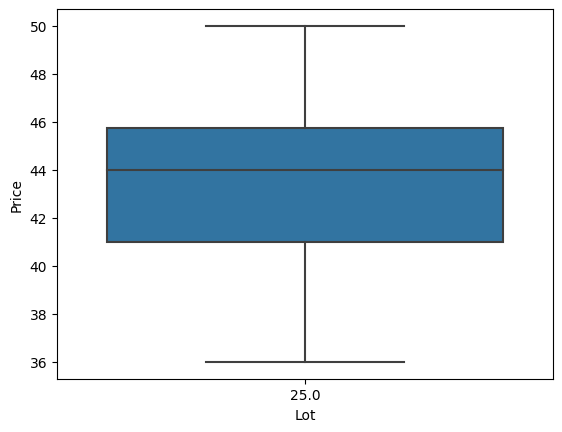

In [28]:
sns.boxplot(x="Lot",y="Price",data=final_filtered[final_filtered.Lot == 25])

In [29]:
df = final_filtered

<Axes: xlabel='Lot', ylabel='Price'>

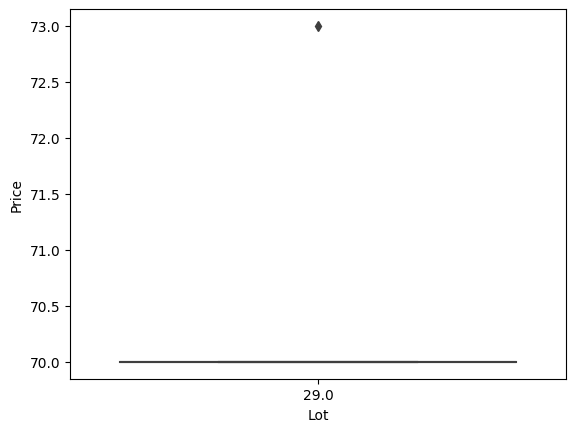

In [30]:
sns.boxplot(x="Lot",y="Price",data=df[df.Lot == 29])

In [31]:
q1 = df["Price"][df.Lot==29].quantile(0.25)
q3 = df["Price"][df.Lot==29].quantile(0.75)

iqr = q3-q1
ul = q3 + (1.5*iqr)
ll = q1 - (1.5*iqr)

ul,ll

(70.0, 70.0)

In [32]:
df_temp = df[df.Lot==29]
df_Lot_filtered = df_temp[((df_temp.Price >= ll) & (df_temp.Price <= ul))]

In [33]:
df_non_Lot = df[df.Lot!=29]
final_filtered = pd.concat([df_non_Lot,df_Lot_filtered])

In [34]:
df_non_Lot.shape[0],df_Lot_filtered.shape[0],final_filtered.shape[0]

(99, 4, 103)

<Axes: xlabel='Lot', ylabel='Price'>

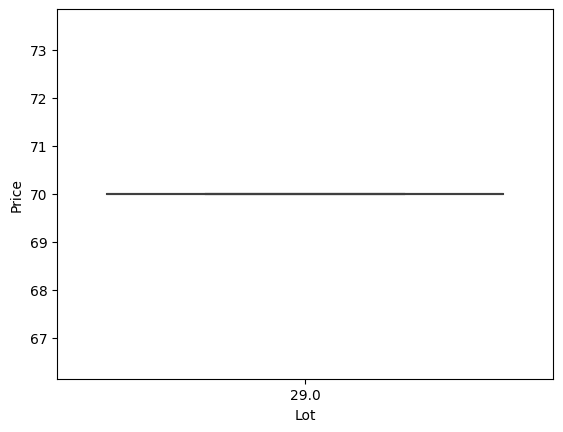

In [35]:
sns.boxplot(x="Lot",y="Price",data=final_filtered[final_filtered.Lot == 29])

In [36]:
label = final_filtered['Price']
others = final_filtered.drop("Price", axis=1)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(others, label, test_size=0.2, random_state=456)

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [40]:
model.fit(x_train,y_train)

LinearRegression()

In [41]:
model.score(x_test,y_test)

0.554153810483919